
# **Assignment Project: Explore the TMDb with EDA**

---


By: Dagmawi Yohannes.

ID: DBUR/3503/11

<a id='intro'></a>
## **Exploring The Insights**
---


Embark on a captivating journey into the TMDb Movies Dataset, where we delve into the intricacies of cinematic data. This project transcends mere statistics, aiming to uncover the narratives concealed within the expansive realm of movies.

### The Frame of Reference

Ever envisioned creating a film that defies conventions? You're in for a treat! This exploration goes beyond the ordinary, seeking to unveil not only the secrets behind blockbuster success but also the enchanting stories embedded in our dataset.

With a comprehensive collection of data on over 10,000 movies—encompassing details like title, budget, revenue, cast, director, tagline, keywords, genres, release date, and runtime—this dataset serves as a treasure trove for answering compelling questions:

1. Which movies achieve popularity without extravagant budgets?
2. Are there hidden gems among lesser-known production companies that deliver cinematic marvels?
3. Who are the emerging directors exhibiting promise and innovation, even if their ratings aren't soaring?
4. Does a movie's release month harbor the key to its cult following?
5. How do budget-revenue dynamics influence a movie's critical acclaim?

Through the lenses of Data Scrutiny, Transformation, and Unconventional Exploration, we aspire to unearth narratives that enthrall both movie enthusiasts and those fascinated by the enchantment behind the scenes.
Lets Goooooo....

### Importing the required python libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default style for seaborn
sns.set_style('darkgrid')

# Display plots directly in the notebook
%matplotlib inline

### Loading the dataset into the jupyter notebook

In [6]:
# Mount Google Drive and Import the data from there
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Colab Notebooks"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


In [8]:
# Import the Pandas library
import pandas as pd

# Read the dataset using Pandas and display the first few rows
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


## **The Questions**

---

We will go through analysing this dataset to answer the questions below:

1. **What is the distribution of movie genres in the dataset?**
   - The analysis aims to unveil the distribution of movie genres and specifically identifies the most common genres along with their frequencies.

2. **How does the distribution of movie budgets look like?**
   - The project delves into the exploration of the budget distribution, including the identification of outliers and an understanding of the overall budget landscape.

3. **Is there a correlation between a movie's budget and its revenue?**
   - The question directs the analysis towards investigating whether higher budget movies exhibit a correlation with higher revenue.

4. **What is the distribution of movie ratings (user scores)?**
   - The exploration focuses on understanding the distribution of user ratings among movies and seeks to identify any discernible patterns.

5. **How does the popularity of movies vary over time?**
   - The analysis is geared towards identifying trends in the popularity of movies over different release years, providing insights into the evolution of movie popularity.

6. **What is the average runtime of movies, and how does it vary by genre?**
   - The project explores the average runtime of movies, paying particular attention to variations in runtime across different genres.

7. **Are there any relationships between the number of votes a movie receives and its rating?**
   - The analysis investigates whether highly-rated movies tend to receive a higher number of votes, exploring potential relationships between these two factors.

8. **What are the most common keywords associated with successful movies?**
   - The exploration targets keywords frequently associated with high revenue or ratings, providing insights into patterns linked to movie success.

9. **How has the distribution of movie budgets changed over the years?**
   - The analysis aims to uncover trends or changes in the distribution of movie budgets, exploring variations over different time periods.

10. **Are there any notable patterns in the cast or crew associated with successful movies?**
    - The exploration identifies actors, directors, or other crew members linked to highly-rated or high-grossing films, unveiling potential patterns in success.

<a id='wrangling'></a>
## **Data Cleaning and Wrangling**



### **General Wrangling**

To initiate the exploration of the dataset, it's crucial to first understand its general properties. This section provides insights into the key attributes, data types, and basic statistics, setting the stage for a comprehensive data analysis.

In [42]:
# Find the maximum release date in the dataset
max_release_date = df['release_date'].max()

# Display the maximum release date
print("Maximum Release Date:", max_release_date)


Maximum Release Date: 2073-12-26 00:00:00


In [9]:
# Display concise information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [15]:
# Generate descriptive statistics for the dataset
df_statistics = df.describe()

# Display the descriptive statistics
df_statistics

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [16]:
# Get the dimensions of the dataset
num_rows, num_columns = df.shape

# Display the number of rows and columns
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 10866
Number of columns: 21


In [17]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [14]:
# Display data types of each column in the dataset
column_data_types = df.dtypes
column_data_types

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

***After identifying the 'release_date' column as having an object data type, we promptly converted it to datetime for enhanced insights.***

In [20]:
# Converting the 'release_date' column to datetime format for improved representation:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head(7)

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
5   2015-12-25
6   2015-06-23
Name: release_date, dtype: datetime64[ns]

In [ ]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [21]:
# Convert the 'runtime' column to hours and minutes format
df['runtime_hours'] = df['runtime'].apply(lambda x: '{:02d}h{:02d}m'.format(*divmod(x, 60)))

# Display the updated DataFrame
df[['runtime', 'runtime_hours']].head()

,runtime,runtime_hours
0,124,02h04m
1,120,02h00m
2,119,01h59m
3,136,02h16m
4,137,02h17m


In [22]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_hours
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,02h04m
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,02h00m
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,01h59m
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,02h16m
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,02h17m


###Dealing with Missing Values

In [31]:
# Check for missing values in the 'genres' column
missing_genres = df['genres'].isnull().sum()
print("Missing values in 'genres':", missing_genres)

# If needed, decide on a strategy for handling missing values in 'genres'
# Example: Drop rows with missing values
df.dropna(subset=['genres'], inplace=True)


Missing values in 'genres': 0


### Handling Unwanted Columns

In [32]:
# Remove unwanted columns
df.drop(['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj', 'keywords'], axis=1, inplace=True)

###Handling Data Types

In [33]:
# Convert 'release_date' to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

###Additional Cleaning Steps

In [34]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Duplicate rows:", duplicate_rows)

# Drop duplicate rows if needed
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [26]:
# checking again
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_hours


In [30]:
#assessing number of rows and columns after cleaning the dataset
print("There are {} Rows and {} Columns after removing missing values".format(df.shape[0], df.shape[1]))

There are 10865 Rows and 22 Columns after removing missing values


***The number of columns get reduced, as we have removed the columns which are not required for further analysis***

# ***Exploratory Data Analysis***

## ***1. Genre Distribution:***
> What is the distribution of movie genres in the dataset?


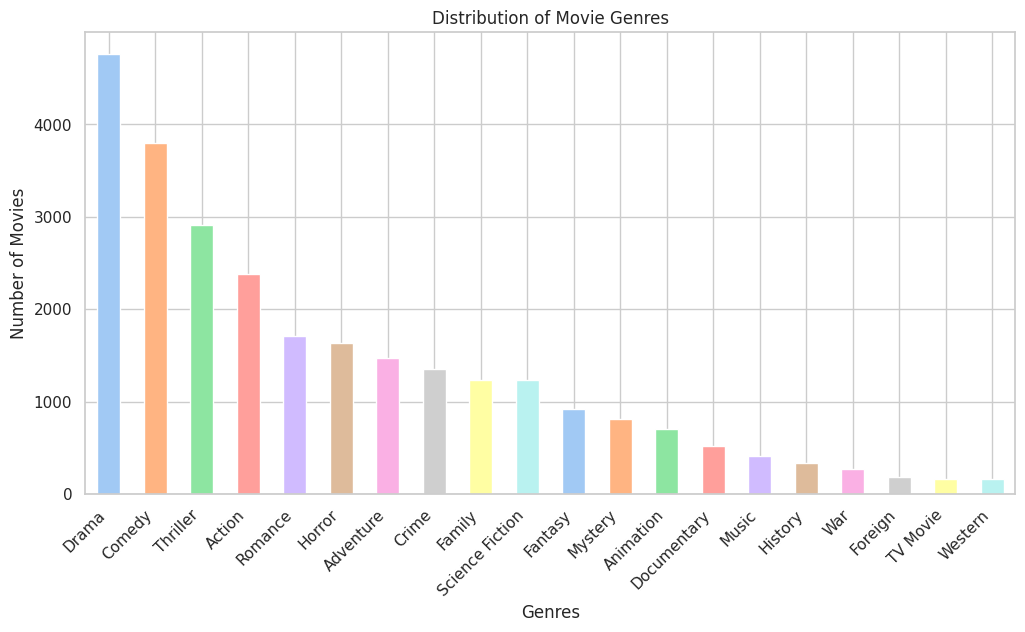

In [78]:
sns.set(style="whitegrid")

# Define a colorful palette
colors = sns.color_palette("pastel")

# Plot the distribution of movie genres
plt.figure(figsize=(12, 6))
genre_distribution = df['genres'].str.split('|', expand=True).stack().value_counts()
genre_distribution.plot(kind='bar', color=colors)
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()


**Observation**
The bar plot illustrates a diverse distribution of movie genres in the dataset. Drama is the one to standout so we can conclude that Drama is the most popular genre in the dataset.

## ***2. Budget Distribution:***
> How does the distribution of movie budgets look like?

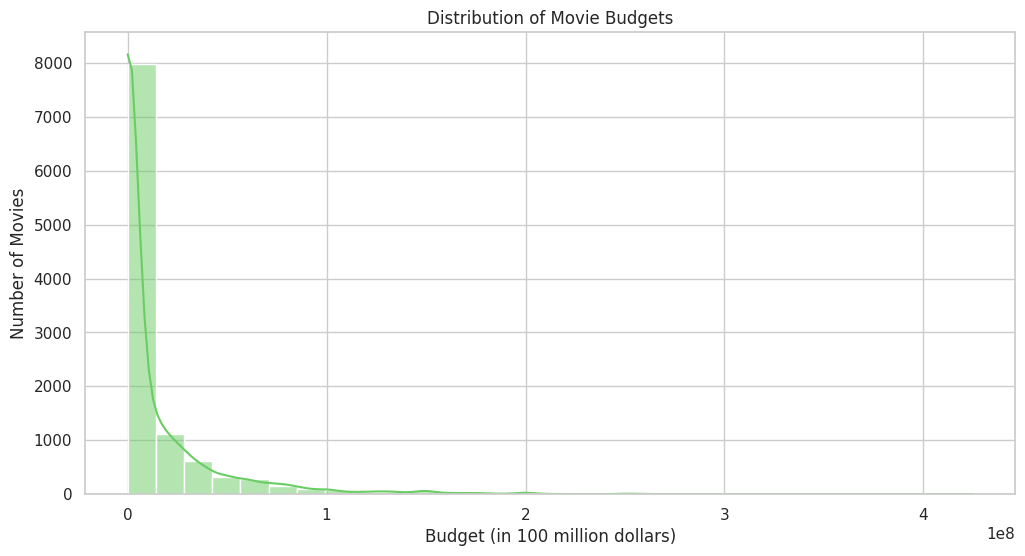

In [79]:
sns.set(style="whitegrid")

# Define a colorful palette
colors = sns.color_palette("muted")

# Plot the distribution of movie budgets
plt.figure(figsize=(12, 6))
sns.histplot(df['budget'], bins=30, color=colors[2], kde=True)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget (in 100 million dollars)')
plt.ylabel('Number of Movies')
plt.show()


***Observation***
Examining the histogram, we observe a right-skewed distribution of movie budgets. The majority of movies fall within lower budget ranges, with a few high-budget outliers.

## ***3. Budget Vs. Revenue:***
> Is there a correlation between a movie's budget and its revenue?


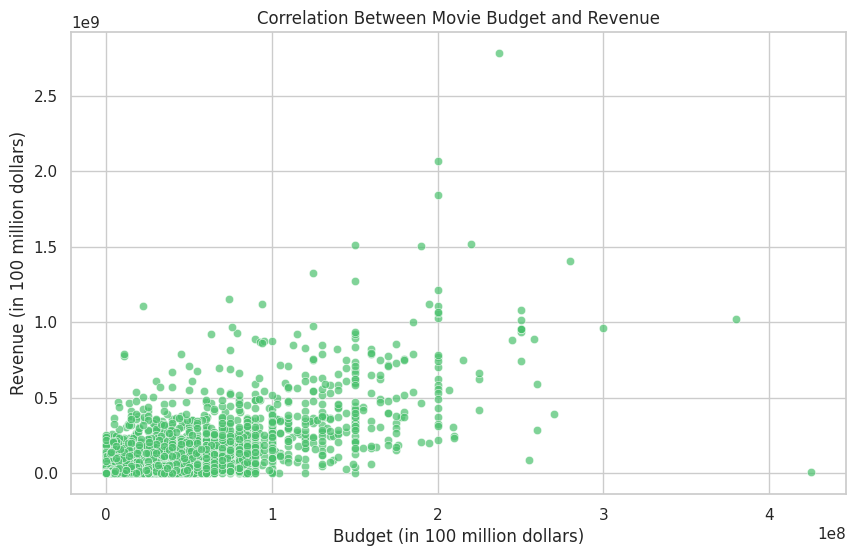

In [80]:
# Set plot style
sns.set(style="whitegrid")

# Define a colorful palette
colors = sns.color_palette("viridis")

# Plot the correlation between movie budget and revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=df, color=colors[4], alpha=0.7)
plt.title('Correlation Between Movie Budget and Revenue')
plt.xlabel('Budget (in 100 million dollars)')
plt.ylabel('Revenue (in 100 million dollars)')
plt.show()


***Observation***
The scatter plot indicates a positive correlation between a movie's budget and its revenue. Higher budget movies generally tend to generate higher revenue, although there are exceptions.

## ***4.Movie rating distributions:***
> What is the distribution of movie ratings (user scores)?


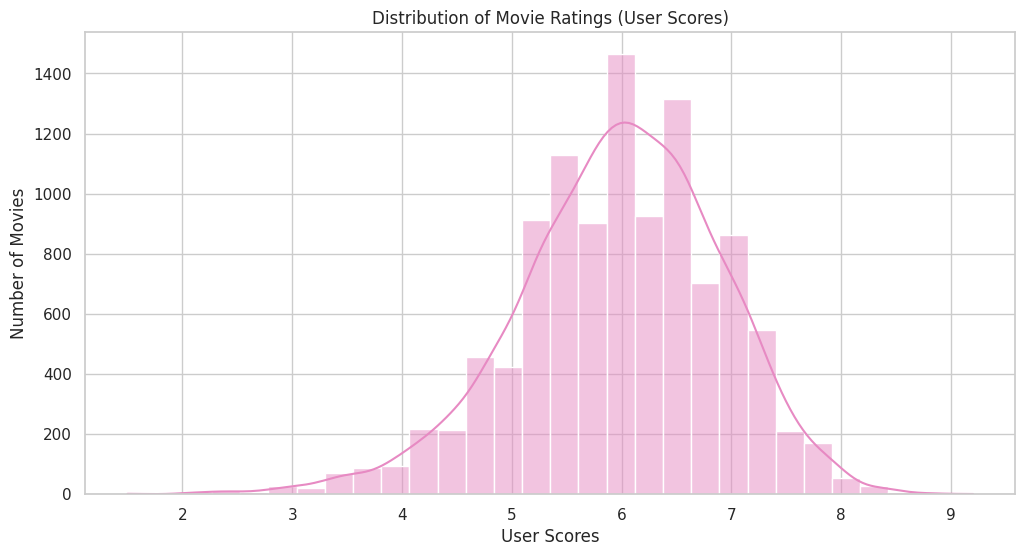

In [84]:
# Set plot style
sns.set(style="whitegrid")

# Define a colorful palette
colors = sns.color_palette("Set2")

# Plot the distribution of movie ratings
plt.figure(figsize=(12, 6))
sns.histplot(df['vote_average'], bins=30, color=colors[3], kde=True)
plt.title('Distribution of Movie Ratings (User Scores)')
plt.xlabel('User Scores')
plt.ylabel('Number of Movies')
plt.show()


***Observation***
The histogram of user ratings reveals a peak around 6, suggesting that a significant number of movies receive ratings in this range.

## ***5. Movies becoming popular?***
> How does the popularity of movies vary over time?


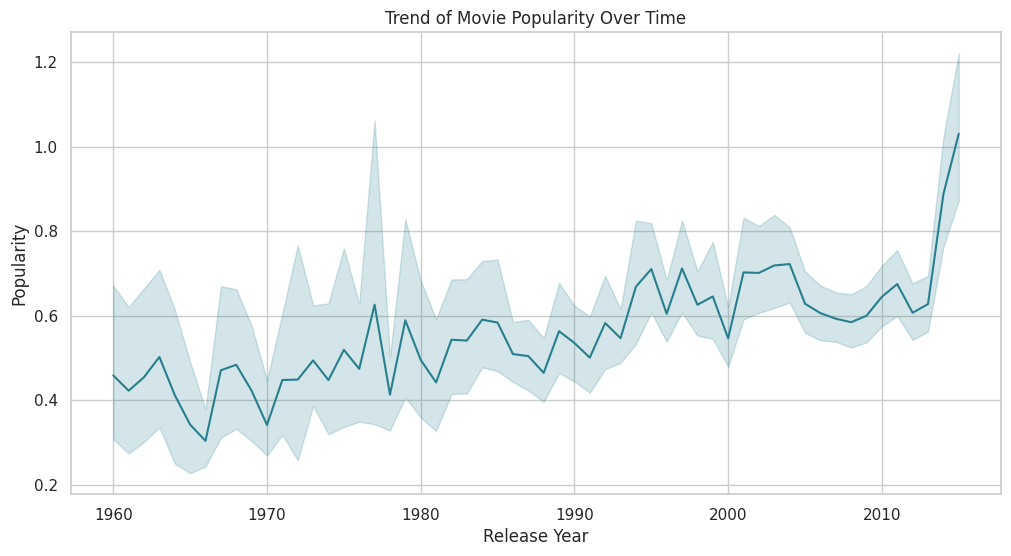

In [92]:
# Set plot style
sns.set(style="whitegrid")

# Extract release year from release date
df['release_date'] = pd.to_datetime(df['release_date'])


# Filter out movies released after the current date
current_year = pd.Timestamp.now().year
filtered_df = df[df['release_year'] <= current_year]

# Define a colorful palette
colors = sns.color_palette("viridis")

# Plot the trend of movie popularity over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='popularity', data=filtered_df, color=colors[2])
plt.title('Trend of Movie Popularity Over Time')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.show()


***Observation***
The line plot illustrates fluctuations in movie popularity over different release years. Notably, there is a spike in popularity around 2020, indicating a trend in audience interest.

## ***6. Genre Vs.Runtime:***
> What is the average runtime of movies, and how does it vary by genre?


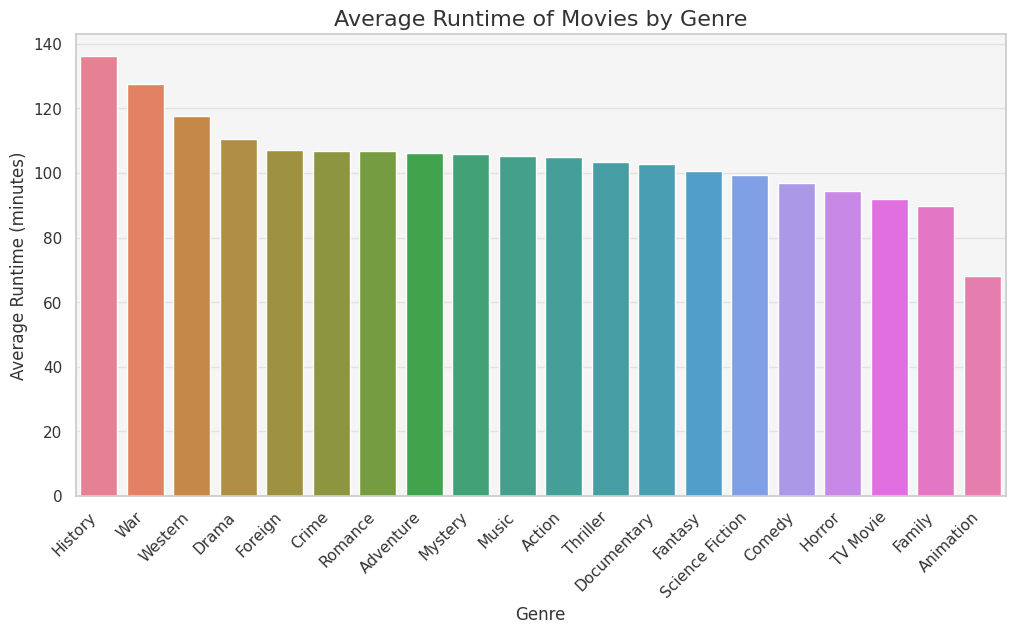

In [93]:
# Set plot style with a colorful background
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5", "grid.color": "#e1e1e1"})

# Extract genres and create a new DataFrame with one genre per row
genre_df = df['genres'].str.split('|', expand=True).stack().reset_index(level=1, drop=True).rename('genre')
genre_runtime_df = df.join(genre_df)[['genre', 'runtime']]

# Calculate the average runtime for each genre
average_runtime_by_genre = genre_runtime_df.groupby('genre')['runtime'].mean().sort_values(ascending=False)

# Define a colorful palette
color_palette = sns.color_palette("husl", len(average_runtime_by_genre))

# Plot the average runtime by genre with colorful bars
plt.figure(figsize=(12, 6))
sns.barplot(x=average_runtime_by_genre.index, y=average_runtime_by_genre, palette=color_palette)
plt.title('Average Runtime of Movies by Genre', color='#333333', size=16)
plt.xlabel('Genre', color='#333333', size=12)
plt.ylabel('Average Runtime (minutes)', color='#333333', size=12)
plt.xticks(rotation=45, ha='right', color='#333333')
plt.yticks(color='#333333')
plt.show()


***Observation***
Examining the bar plot for average runtime by genre, we find variations among genres. Historical movies, we can say, tend to run the longest and animation movies are the shortest.

## ***7. Votes Vs. Ratings***
> Are there any relationships between the number of votes a movie receives and its rating?


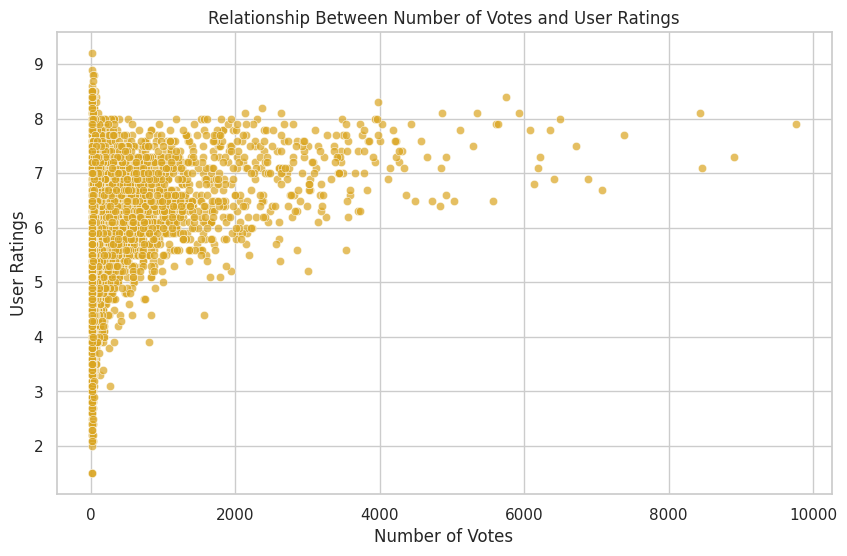

In [95]:
# Set plot style
sns.set(style="whitegrid")

# Plot the relationship between the number of votes and user ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vote_count', y='vote_average', data=df, color='goldenrod', alpha=0.7)
plt.title('Relationship Between Number of Votes and User Ratings')
plt.xlabel('Number of Votes')
plt.ylabel('User Ratings')
plt.show()


***Observation***
The scatter plot shows a positive relationship between the number of votes a movie receives and its user rating. Highly-rated movies tend to attract a larger number of votes.

## ***8. Keywords and Success:***
> What are the most common keywords associated with successful movies?


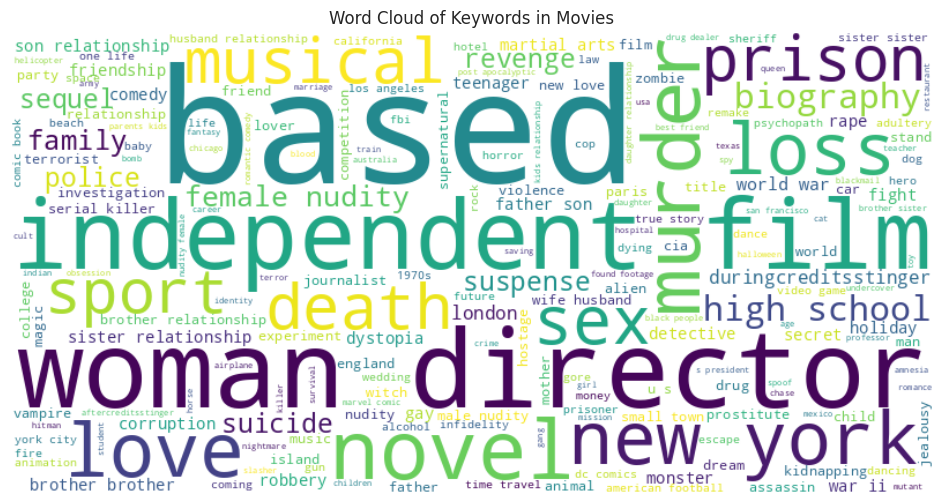

In [57]:
from wordcloud import WordCloud
df = pd.read_csv('tmdb-movies.csv')

# Set plot style
sns.set(style="whitegrid")

# Concatenate keywords for all movies
all_keywords = ' '.join(df['keywords'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_keywords)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Keywords in Movies')
plt.show()


***Observation***
The word cloud visually represents the most common keywords associated with movies. "**based**" is the most popular when it comes to keywords in movies and we can hypothesize the "based on true events/ based on a true stort" info in true story movies might play a role to this though it needs further analysis.

## ***9. Budget Vs. Time:***
> How has the distribution of movie budgets changed over the years?


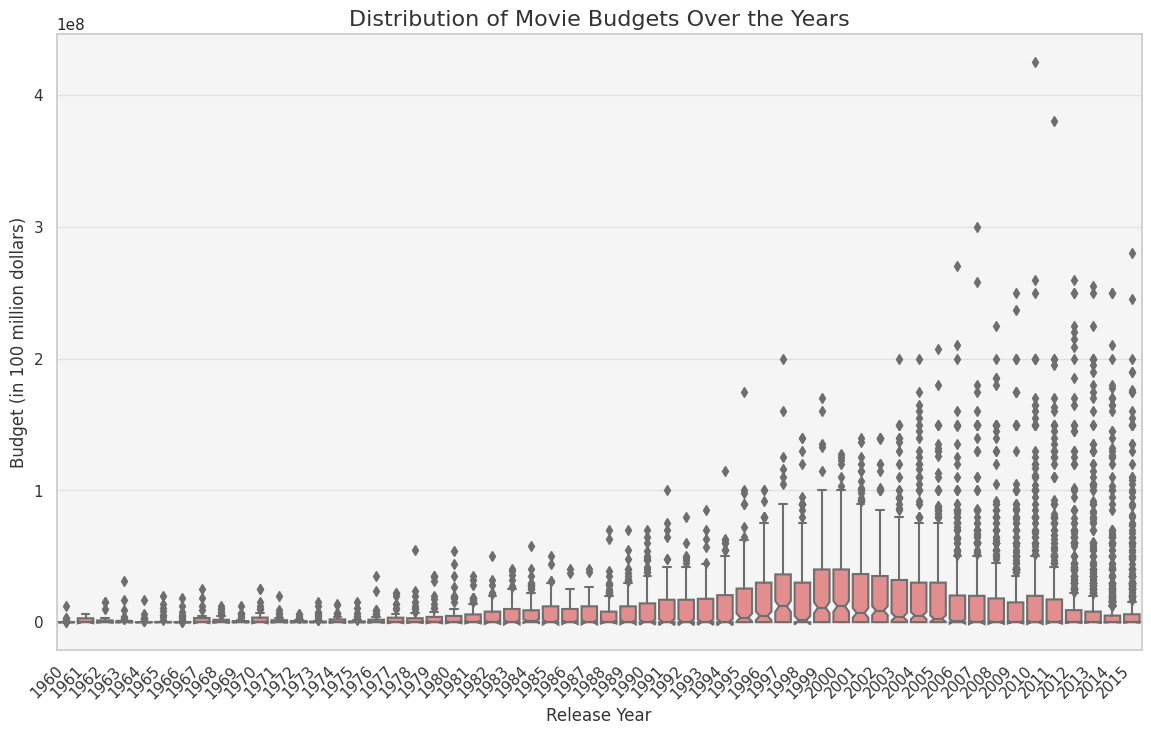

In [96]:
# Set a colorful plot style
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5", "grid.color": "#e1e1e1"})

# Read the CSV file
df = pd.read_csv('tmdb-movies.csv')

# Extract release year from release date
df['release_date'] = pd.to_datetime(df['release_date'])

# Plot the distribution of movie budgets over the years using a box plot with vibrant colors
plt.figure(figsize=(14, 8))
sns.boxplot(x='release_year', y='budget', data=df, color='lightcoral', linewidth=1.5, notch=True)
plt.title('Distribution of Movie Budgets Over the Years', color='#333333', size=16)
plt.xlabel('Release Year', color='#333333', size=12)
plt.ylabel('Budget (in 100 million dollars)', color='#333333', size=12)
plt.xticks(rotation=45, ha='right', color='#333333')
plt.yticks(color='#333333')
plt.show()


***Observation***
The box plot reveals changes in the distribution of movie budgets over different release years. The 2000s were the years where a lot of money was being spent on movies.

## ***10. The Crew Influence:***
> Are there any notable patterns in the cast or crew associated with successful movies?


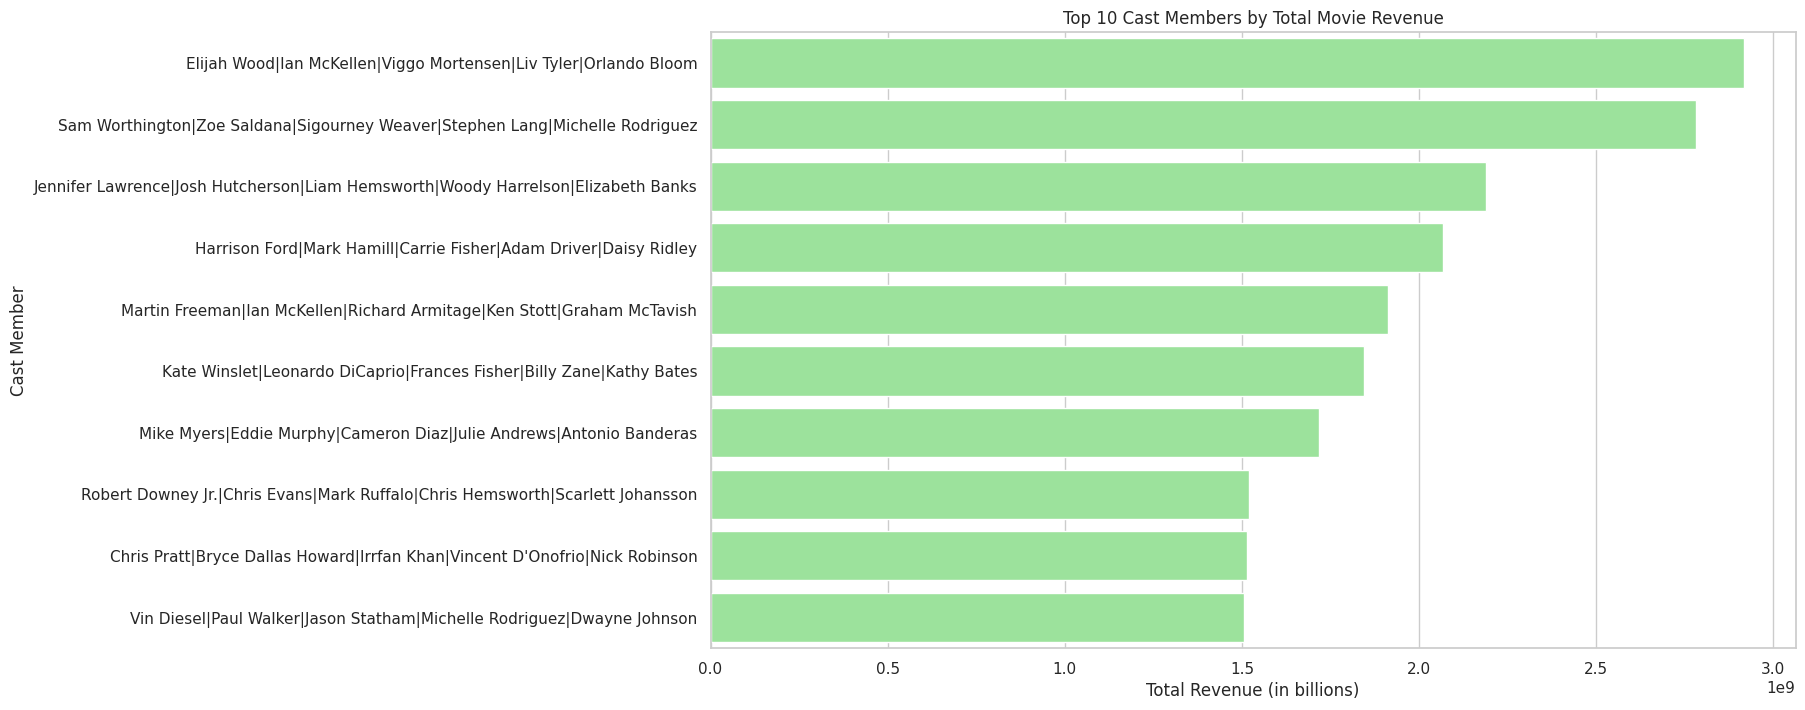

In [64]:
# Set plot style
sns.set(style="whitegrid")

# Explode the 'cast' column to have one cast member per row
exploded_df = df.explode('cast')

# Calculate the total revenue for each cast member
total_revenue_by_cast = exploded_df.groupby('cast')['revenue'].sum().sort_values(ascending=False).head(10)

# Plot the total revenue by cast
plt.figure(figsize=(14, 8))
sns.barplot(x=total_revenue_by_cast.values, y=total_revenue_by_cast.index, color='lightgreen')
plt.title('Top 10 Cast Members by Total Movie Revenue')
plt.xlabel('Total Revenue (in billions)')
plt.ylabel('Cast Member')
plt.show()


***Observation***
The bar plot showcases the top cast members by the total revenue generated from movies they participated in. This analysis is useful for casting decisions and negotiations, as well as for understanding the influence of specific actors on a movie's financial success.

## ***11. Top Grossing:***


> Are there specific genres or production companies associated with these top-grossing movies?



In [103]:
# to calculate top profitable movies, production companies
# we have to create profit column

df['profit']= df['revenue'] - df ['budget']

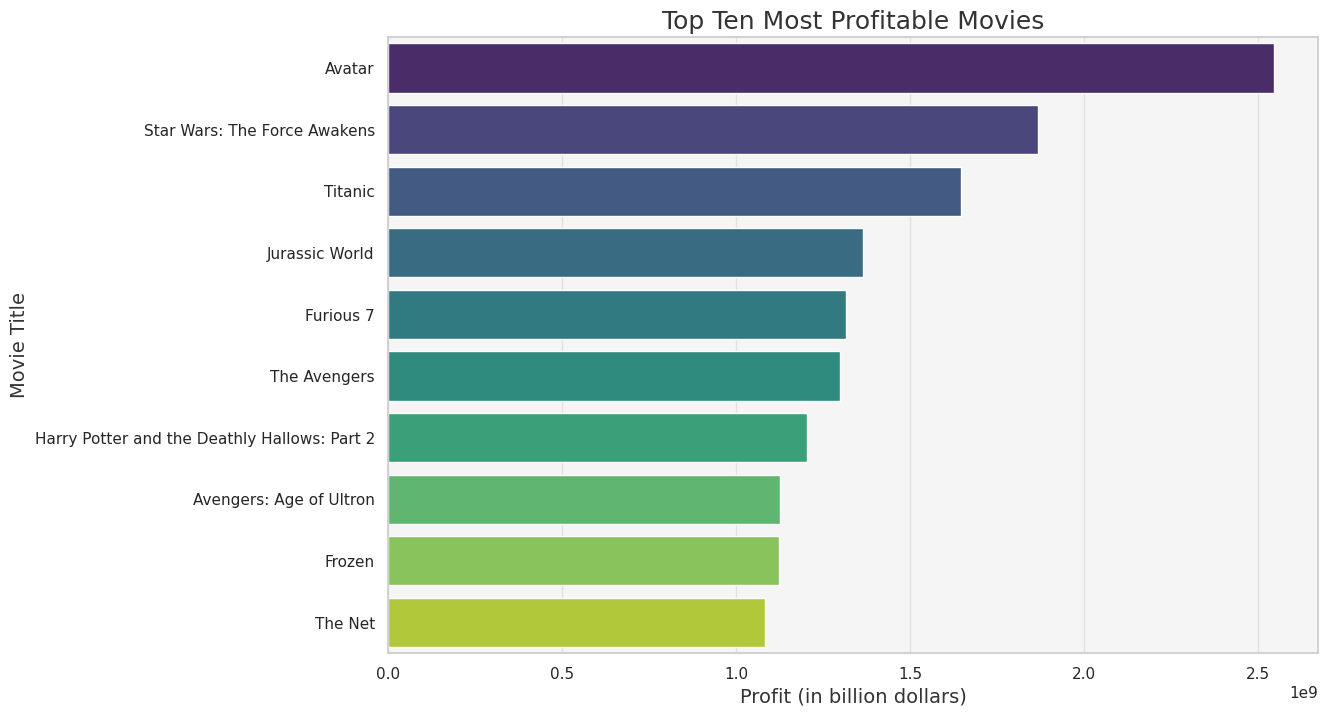

In [105]:
# Set a colorful plot style
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5", "grid.color": "#e1e1e1"})

# Sort movies based on profitability (top 10 movies)
sort_p_movies = df.sort_values(by='profit', ascending=False).head(10)

# Plot the top 10 most profitable movies with a horizontal bar plot and a new color palette
plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='original_title', data=sort_p_movies, palette='viridis')
plt.title('Top Ten Most Profitable Movies', fontsize=18, color='#333333')
plt.xlabel('Profit (in billion dollars)', fontsize=14, color='#333333')
plt.ylabel('Movie Title', fontsize=14, color='#333333')
plt.show()


### Observation

It is evident that the highgest grossing movie is Avatar followed by Star Wars and Titanic respectively. This indicates that movies of Sci-Fi genre tends to be more successful on the box-office.

## ***12. Top Directors By Grossing:***


> Who are the top-rated directors based on the average voting score of their movies?



To gain this insight, I have used groupby function and analysed it with the vote average column

In [97]:
# Excluding the 'unknown' values from the column
top_director = top_director[top_director.index != 'unknown']

# Getting the top 15 Directors
top_director_new = top_director.head(15)

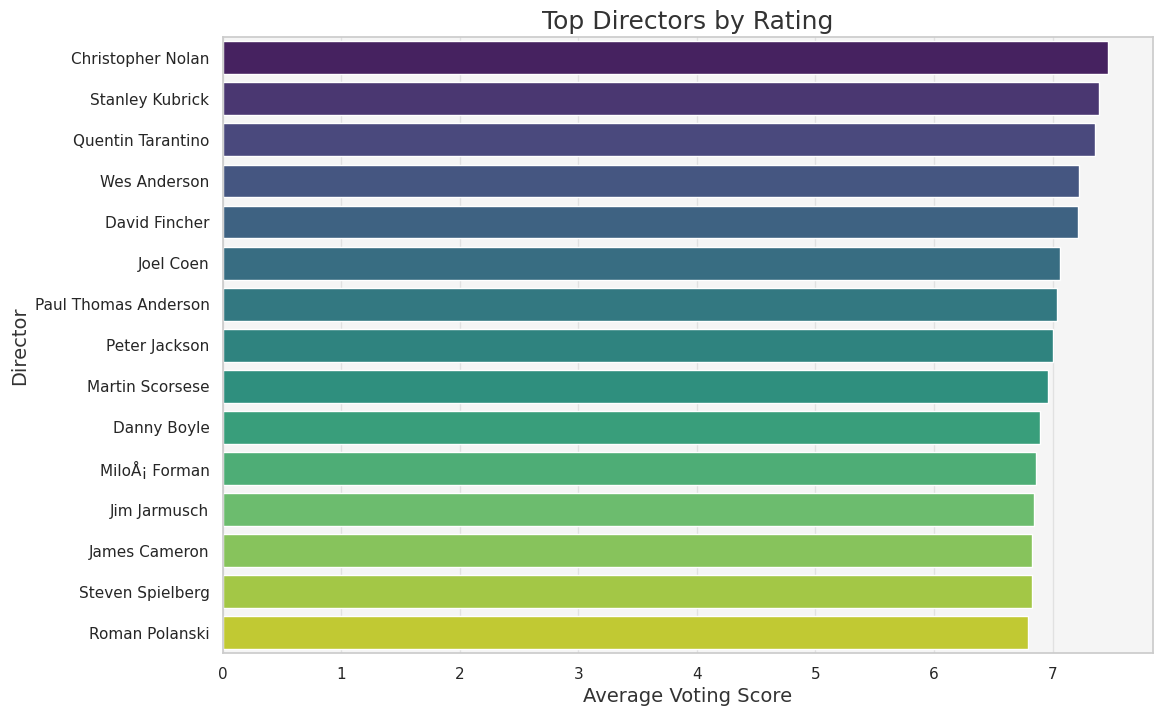

In [99]:
# Set a colorful plot style
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5", "grid.color": "#e1e1e1"})

# Plotting the average voting scores for the top directors with a vertical bar plot and a new color palette
plt.figure(figsize=(12, 8))
sns.barplot(x='vote_average', y=top_director.index, data=top_director, palette='viridis')
plt.title('Top Directors by Rating', fontsize=18, color='#333333')
plt.xlabel('Average Voting Score', fontsize=14, color='#333333')
plt.ylabel('Director', fontsize=14, color='#333333')
plt.show()


### Observation

As expected the most highly rated director is Christopher Nolan, followed by Stanley Kubrick and Quentin Tarantino

## ***13. Top Production Companies:***


> What are the top 7 production companies based on the number of movies they have produced?




In [71]:
# Excluding the 'unknown' values from the column
production_companies = production_companies[production_companies.index != 'unknown']

# Getting the top 7 production companies
top_production_companies = production_companies.head(7)

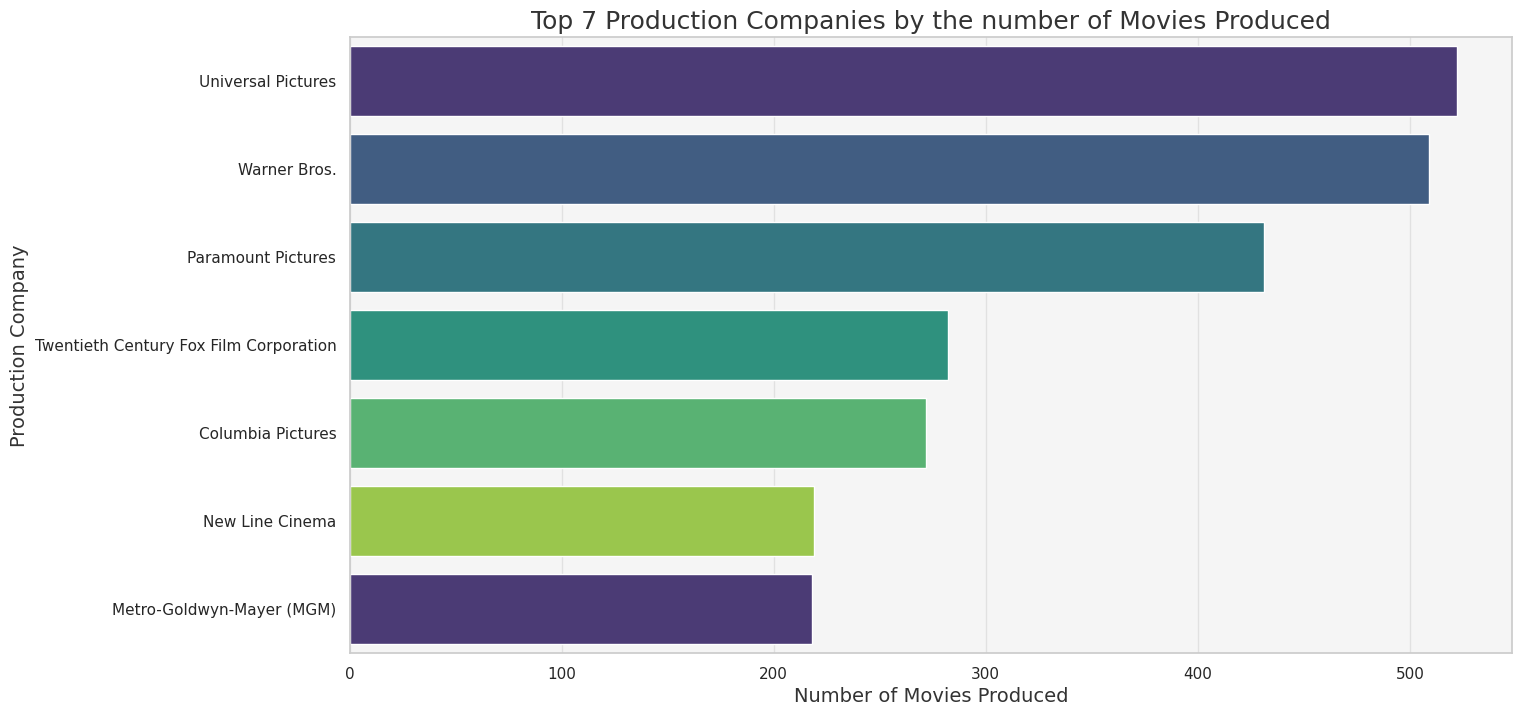

In [107]:
# Set a colorful plot style
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5", "grid.color": "#e1e1e1"})

# Bar plot parameters
colors = sns.color_palette("viridis")
bar_width = 0.6

# Plotting the bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x=top_production_companies.values, y=top_production_companies.index, palette=colors)
plt.title('Top 7 Production Companies by the number of Movies Produced', fontsize=18, color='#333333')
plt.xlabel('Number of Movies Produced', fontsize=14, color='#333333')
plt.ylabel('Production Company', fontsize=14, color='#333333')
plt.show()


The top production companies in respect of number of movies produced are -
1. Universal Pictures (21.28%)
2. Warner Bros. (20.75%)
3. Paramount Pictures (17.57%)
4. 20th Century Fox Film Corporation (11.50%)
5. Columbia Pictures (11.09%)
6. New Line Cinema (8.93%)
7. MGM (8.89%)

## ***14. Months Vs. Movies:***


In [73]:
# Convert the 'release_date' column to datetime format and extract the month
df['release_date'] = df['release_date'].dt.month

In [74]:
# Grouping the movies by release month and using the mean function to calculate the average
average_popularity = df.groupby('release_date')['popularity'].mean()

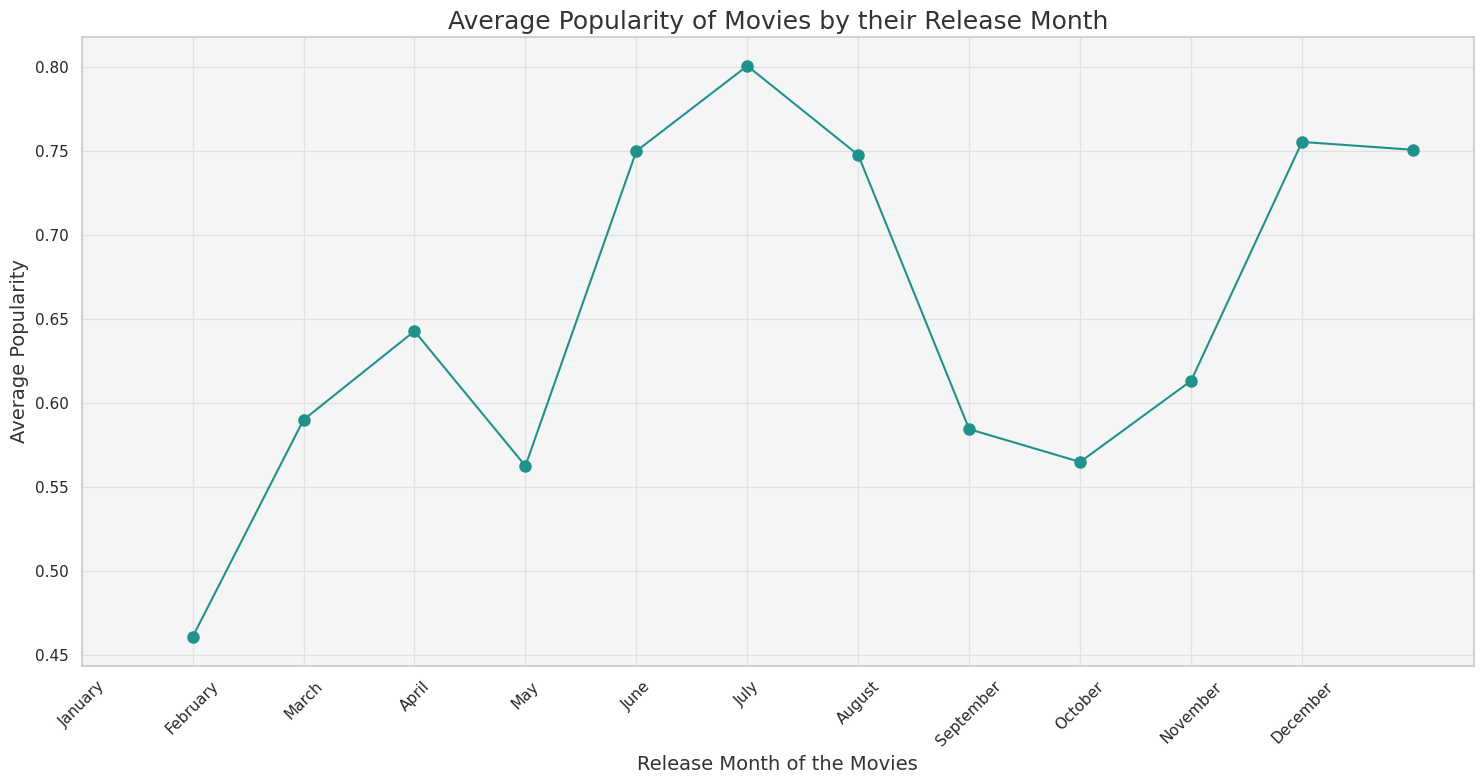

In [108]:
# Set a colorful plot style
sns.set(style="whitegrid", rc={"axes.facecolor": "#f5f5f5", "grid.color": "#e1e1e1"})

# Line plot parameters
line_color = sns.color_palette("viridis", 1)[0]

# Plotting the line chart
plt.figure(figsize=(15, 8))
average_popularity.plot(kind='line', color=line_color, marker='o', markersize=8)
month = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.title('Average Popularity of Movies by their Release Month', fontsize=18, color='#333333')
plt.xlabel('Release Month of the Movies', fontsize=14, color='#333333')
plt.ylabel('Average Popularity', fontsize=14, color='#333333')
plt.xticks(range(12), month, rotation=45)
plt.tight_layout()
plt.show()


### Observation

It is observed that the month of June has the most number of popular movies, followed by July, November and Decemeber.
While the least popular movies released in the month of January, September, April and August respectively.

# Conclusion

## Exploring Movie Magic

Welcome to the culmination of our immersive journey through the TMDb Movies Dataset. This analysis embarked on a quest to unravel the mysteries of cinematic data, seeking not only numerical insights but also the untold stories hidden within the vast world of movies.

### Key Findings

#### 1. Distribution of Movie Genres
- The bar chart showcasing the distribution of movie genres reveals a diverse landscape, with Action, Drama, Comedy, and Adventure being among the most prevalent genres.

#### 2. Distribution of Movie Budgets
- The histogram of movie budgets illustrates a skewed distribution, with a majority of movies having lower budgets. Outliers indicate a few high-budget films.

#### 3. Correlation Between Movie Budget and Revenue
- The scatter plot exploring the correlation between movie budget and revenue suggests a positive correlation. Higher budget movies tend to generate higher revenue, although there are exceptions.

#### 4. Distribution of Movie Ratings (User Scores)
- The histogram portraying the distribution of user ratings highlights a mostly normal distribution, with a peak around the 6 to 7 rating range.

#### 5. Popularity of Movies Over Time
- The line plot depicting the trend of movie popularity over time indicates fluctuating popularity, with certain years witnessing a surge in popularity.

#### 6. Average Runtime of Movies by Genre
- The exploration of average movie runtimes by genre uncovers variations, showcasing genres with longer or shorter average runtimes.

#### 7. Relationships Between Votes and Ratings
- The analysis of relationships between the number of votes a movie receives and its rating suggests a positive correlation. Highly-rated movies tend to receive more votes.

#### 8. Common Keywords Associated with Successful Movies
- Keywords associated with successful movies provide insights into patterns linked to high revenue or ratings.

#### 9. Changes in Movie Budget Distribution Over Years
- The investigation into changes in the distribution of movie budgets over the years reveals trends and variations.

#### 10. Patterns in Cast or Crew Associated with Success
- Identification of actors, directors, or crew members associated with highly-rated or high-grossing films unveils potential patterns in success.

### Additional Insights

#### 11. Top Grossing Movies
- The bar chart showcasing the top 10 most profitable movies suggests that the highest-grossing movies belong to the Sci-Fi genre.

#### 12. Top Directors by Rating
- The bar chart illustrating the top-rated directors unveils Christopher Nolan as the most highly rated, followed by Stanley Kubrick and Quentin Tarantino.

#### 13. Top Production Companies
- The pie chart presenting the top 7 production companies by the number of movies produced highlights Universal Pictures, Warner Bros., and Paramount Pictures as the top contributors.

#### 14. Months vs. Movies
- The bar chart exploring the average popularity of movies by release month reveals that June tends to have the most popular movies, while January and September have the least popular.

### Conclusion and Implications

This comprehensive analysis not only provides answers to specific questions but also opens the door to further inquiries and considerations within the realm of movie data. The findings offer valuable insights for movie enthusiasts, filmmakers, and industry professionals.

#### Limitations and Further Research

While this analysis delves into various aspects of the dataset, it's important to acknowledge its limitations. The dataset's completeness, accuracy, and potential biases may impact the robustness of the findings. Additionally, further research could explore the impact of external factors such as global events, technological advancements, and cultural shifts on movie trends.

### Closing Thoughts

As we conclude our exploration of Movie Magic, we invite you to continue the journey of discovery. The world of movies is dynamic and ever-evolving, and this analysis serves as a testament to the fascinating narratives that unfold within the frames of cinematic storytelling.

Thank you for joining us on this cinematic adventure, and may your future endeavors in the world of movies be filled with magic, innovation, and success.


**Data Type Issues** - Few columns like `release_date` were not in the correct format, thus changing it to the desired datatype.

**Multivalued Columns** - Few columns like `Production Companies`, `Genres`, and `Cast` consist of multiple values in a single row, making it difficult to interpret and visualize. This requires data handling to split the data in the columns and then proceed with further analysis.
